# DSCI 503-Homework 04
### Shahal Algunaid
### due 9/25/2023

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


## Problem 1: Sample Mean and Variance

In [2]:
x = np.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])
n = len(x)
mean = np.sum(x)/n
diff = np.array(abs(x-mean))
var = np.sum(diff**2)/(n - 1)
print("Sample Mean:\t",mean)
print("Sample Variance:",var)

Sample Mean:	 16.6
Sample Variance: 25.6


In [3]:
mean_np = np.mean(x)
var_np = np.var(x,ddof=1)
print("Sample Mean:\t", mean_np)
print("Sample Variance:",var_np)

Sample Mean:	 16.6
Sample Variance: 25.6


## Problem 2: Scoring a Regression Model


In [4]:
def find_sse(true_y, pred_y):
    sse = np.sum(np.square(np.subtract(true_y,pred_y)))
    return sse

In [5]:
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])
sse_1 = find_sse(true_y, pred_1)
sse_2 = find_sse(true_y, pred_2)
print("Model 1 SSE:",round(sse_1,2))
print("Model 2 SSE:",round(sse_2,2))


Model 1 SSE: 22.66
Model 2 SSE: 19.9


## Problem 3: Scoring a Classification Model

In [6]:
def find_accuracy(true_y, pred_y):
    true_y=np.array(true_y)
    pred_y=np.array(pred_y)
    number_correct = np.sum(true_y == pred_y)
    total_observations = len(true_y)
    accuracy = number_correct / total_observations
    return accuracy

In [7]:
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N', 'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'N', 'P', 'N'])
accuracy_diag = find_accuracy(true_diag, pred_diag)
print("Model Accuracy:", accuracy_diag)

Model Accuracy: 0.75


In [8]:
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])
accuracy_labels = find_accuracy(true_labels, pred_labels)
print("Model Accuracy:", accuracy_labels )

Model Accuracy: 0.875


## Problem 4: Classification Report

In [9]:
def classification_report(true_y, pred_y):
    true = np.array(true_y)
    pred = np.array(pred_y)
    classes = np.unique(true_y)
    negative_class = classes[0]
    positive_class = classes[1]
    accuracy = find_accuracy(true_y, pred_y)
    TP = np.sum((true_y == positive_class) & (pred_y == positive_class))
    FP = np.sum((true_y == negative_class) & (pred_y == positive_class))
    TN = np.sum((true_y == negative_class) & (pred_y == negative_class))
    FN = np.sum((true_y == positive_class) & (pred_y == negative_class))
    positive_precision = TP / (TP + FP) 
    positive_recall = TP / (TP + FN) 
    negative_precision = TN / (TN + FN)
    negative_recall = TN / (TN + FP)
    print("Positive Class:\t\t",positive_class)
    print("Negative Class:\t\t",negative_class,"\n")
    print("Accuracy:", round(accuracy, 4))
    print("Positive Precision:\t", round(positive_precision, 4))
    print("Positive Recall:\t", round(positive_recall, 4))
    print("Negative Precision:\t", round(negative_precision, 4))
    print("Negative Recall:\t", round(negative_recall, 4))

In [10]:
classification_report(true_diag, pred_diag)

Positive Class:		 P
Negative Class:		 N 

Accuracy: 0.75
Positive Precision:	 0.5556
Positive Recall:	 0.8333
Negative Precision:	 0.9091
Negative Recall:	 0.7143


In [11]:
classification_report(true_labels,pred_labels)

Positive Class:		 dog
Negative Class:		 cat 

Accuracy: 0.875
Positive Precision:	 0.8333
Positive Recall:	 0.9091
Negative Precision:	 0.9167
Negative Recall:	 0.8462


## Problem 5: Transformation of Random Variables

In [12]:
np.random.seed(1)
X = np.random.normal(0, 0.4, 25000)
Y = np.exp(X)
mean_X = np.mean(X)
std_dev_X = np.std(X, ddof=1)
mean_Y = np.mean(Y)
std_dev_Y = np.std(Y, ddof=1)
print("Sample Mean of X:\t",round(mean_X,4))
print("Sample Std Dev of X:\t",round(std_dev_X,4))
print("Sample Mean of Y:\t",round(mean_Y,4))
print("Sample Std Dev of Y:\t",round(std_dev_Y,4))


Sample Mean of X:	 0.0025
Sample Std Dev of X:	 0.4002
Sample Mean of Y:	 1.0862
Sample Std Dev of Y:	 0.4537


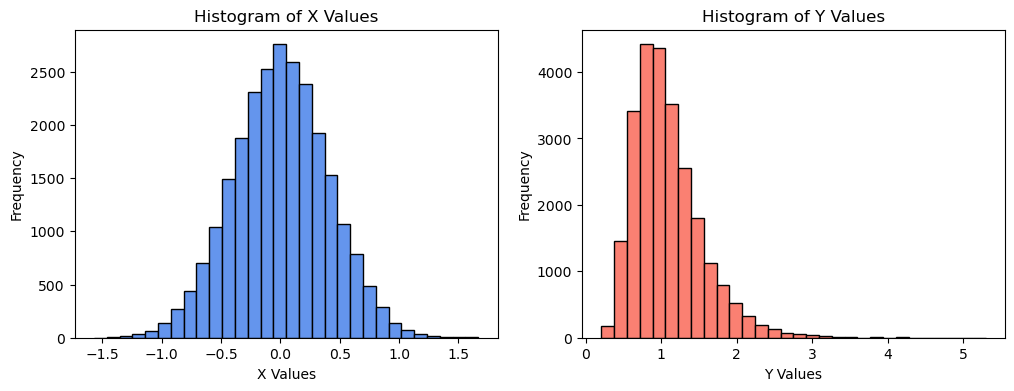

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(X,  edgecolor='black', color='cornflowerblue',bins=30,)
axes[0].set_title("Histogram of X Values")
axes[0].set_xlabel("X Values")
axes[0].set_ylabel("Frequency")
axes[1].hist(Y, edgecolor='black', color='salmon',bins=30,)
axes[1].set_title("Histogram of Y Values")
axes[1].set_xlabel("Y Values")
axes[1].set_ylabel("Frequency")
plt.show()


In [14]:
less_than_0_5 = np.mean(Y < 0.5)
less_than_1_0 = np.mean(Y < 1)
less_than_2_0 = np.mean(Y < 2)
print("Probability that Y is less than 0.5:\t",round(less_than_0_5,4))
print("Probability that Y is less than 1.0:\t",round(less_than_1_0,4))
print("Probability that Y is less than 2.0:\t",round(less_than_2_0,4))


Probability that Y is less than 0.5:	 0.041
Probability that Y is less than 1.0:	 0.4969
Probability that Y is less than 2.0:	 0.9574


## Problem 6: Stochastic Linear Relationships

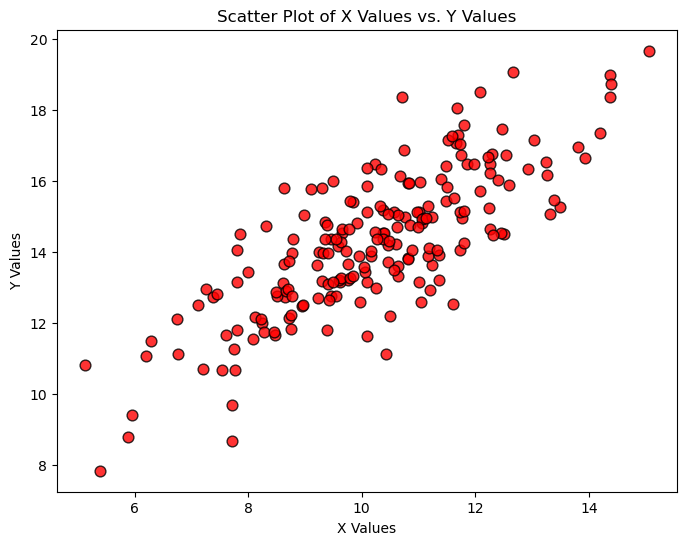

In [15]:
np.random.seed(1)
x_vals = np.random.normal(10, 2, 200)
errors = np.random.normal(0, 1.2, 200)
y_vals = 5.1 + 0.9 * x_vals + errors
plt.figure(figsize=(8, 6))
plt.scatter(x_vals, y_vals, s=60, alpha=0.8, edgecolors='black', c='red')
plt.title("Scatter Plot of X Values vs. Y Values")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()

In [16]:
diff_x = x_vals - np.mean(x_vals)
diff_y = y_vals - np.mean(y_vals)
top_fraction = np.sum(diff_x * diff_y)
bottom_sqrt_x = np.sqrt(np.sum(diff_x**2))
bottom_sqrt_y = np.sqrt(np.sum(diff_y**2))
r = top_fraction / (bottom_sqrt_x * bottom_sqrt_y)
print("Correlation between X and Y:",round(r,4))


Correlation between X and Y: 0.7861


## Problem 7: Relationship between Life Expectancy and Per Capita GDP## 

In [17]:
import pandas as pd
df = pd.read_csv('gapminder_data.txt', sep='\t')
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [18]:
continent_list = ['africa', 'americas', 'asia', 'europe']
color_list = ['fuchsia', 'orange', 'red', 'mediumblue']

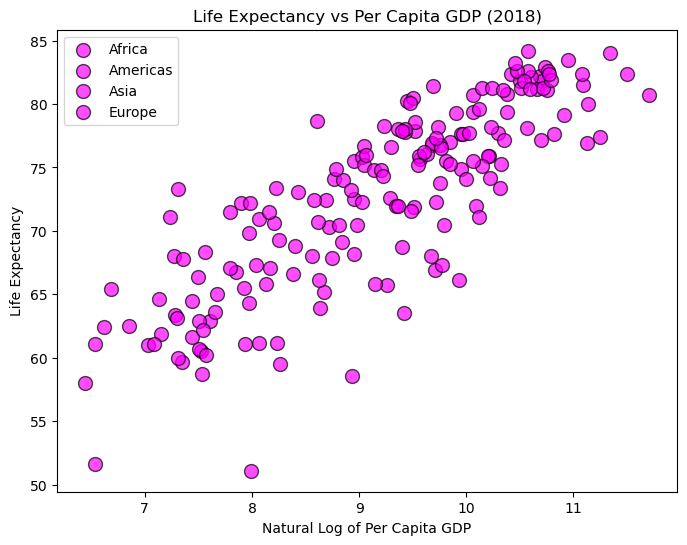

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
for cont, color in zip(continent_list, color_list):
    sel = (continent == cont)& (year == 2018)
    ax.scatter(np.log(pcgdp[sel]), life_exp[sel], s=100, alpha=0.7, edgecolors='black', c='fuchsia', label=cont.capitalize())
ax.set_xlabel('Natural Log of Per Capita GDP')
ax.set_ylabel('Life Expectancy')
ax.set_title('Life Expectancy vs Per Capita GDP (2018)')
plt.legend()
plt.show()


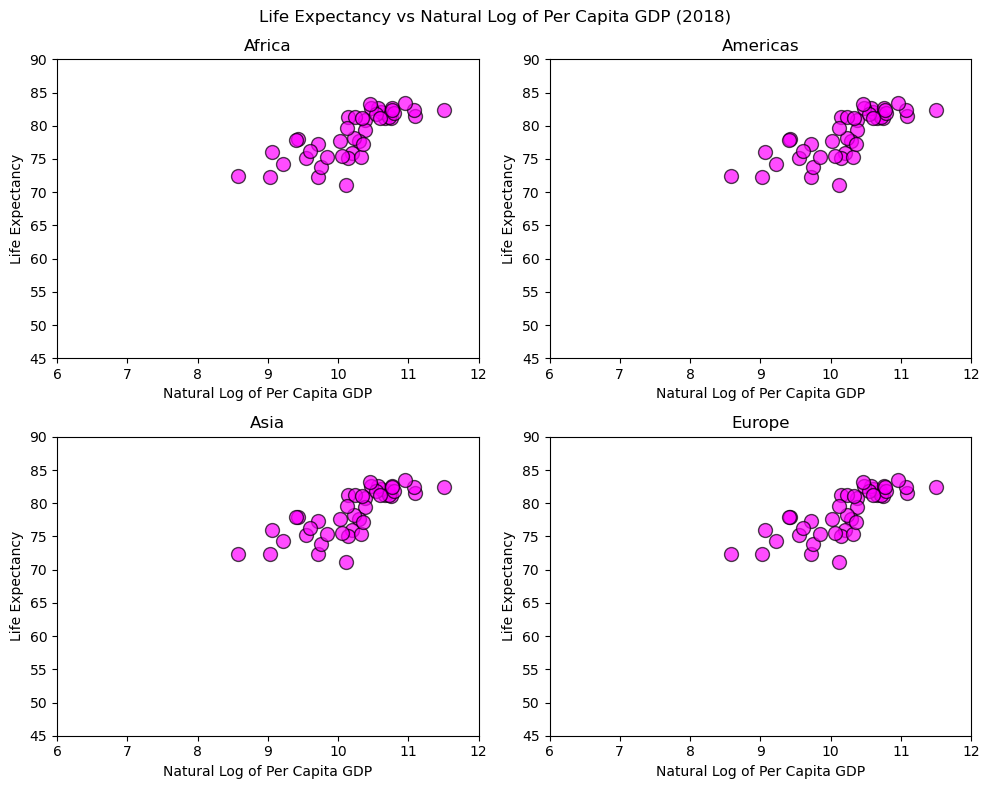

In [20]:
fig = plt.figure(figsize=[10, 8])
fig.suptitle('Life Expectancy vs Natural Log of Per Capita GDP (2018)')
for i, continent_name in enumerate(continent_list):
    sel = (continent == cont) & (year == 2018)
    ax = plt.subplot(2, 2, i + 1)
    sc = ax.scatter(np.log(pcgdp[sel]), life_exp[sel], s=100, alpha=0.7, edgecolor='black', c='fuchsia')
    ax.set_xlim(6, 12)
    ax.set_ylim(45, 90)
    ax.set_xlabel('Natural Log of Per Capita GDP')
    ax.set_ylabel('Life Expectancy')
    ax.set_title(continent_name.capitalize()) 
plt.tight_layout()
plt.show()

## Problem 8: Trends by Country

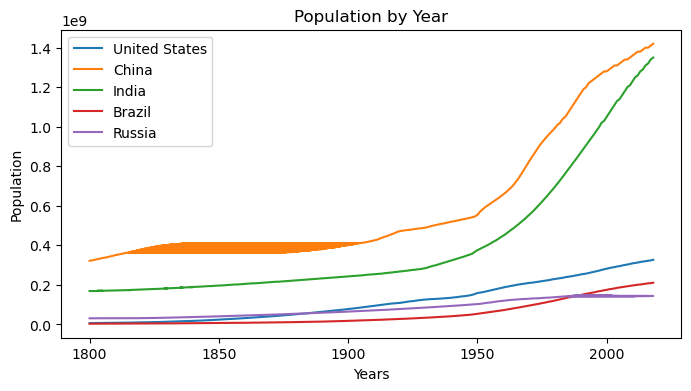

In [21]:
countries_list =  ['United States', 'China', 'India', 'Brazil', 'Russia']
data= pd.read_csv('gapminder_data.txt', sep='\t')
data = data[data['country'].isin(countries_list)].sort_values('population').reset_index(drop=True)
plt.figure(figsize=[8, 4])
for country in countries_list:
    df = data[data['country'] == country]
    plt.plot(df['year'], df['population'], label=country)
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population by Year')
plt.legend()
plt.show()


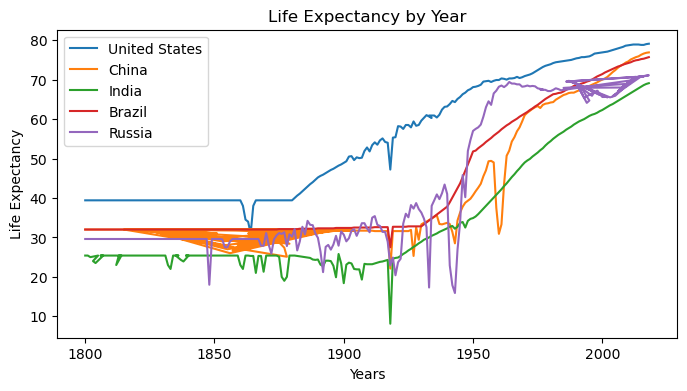

In [22]:
countries_list = ['United States', 'China', 'India', 'Brazil', 'Russia']
data = data[data['country'].isin(countries_list)]
plt.figure(figsize=[8, 4])
for country in countries_list:
    df = data[data['country'] == country]
    plt.plot(df['year'], df['life_exp'], label=country)
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year')
plt.legend()
plt.show()
